# MULTIVARIATE REGRESSION

## Import the modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing = pd.read_csv('dataMVR.txt', names=['size', 'bedroom', 'price'])
housing

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [45]:
housing.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Normalization

In [5]:
housing = (housing - housing.mean())/housing.std()

In [37]:
X = housing.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

        size   bedroom
0   0.130010 -0.223675
1  -0.504190 -0.223675
2   0.502476 -0.223675
3  -0.735723 -1.537767
4   1.257476  1.090417
5  -0.019732  1.090417
6  -0.587240 -0.223675
7  -0.721881 -0.223675
8  -0.781023 -0.223675
9  -0.637573 -0.223675
10 -0.076357  1.090417
11 -0.000857 -0.223675
12 -0.139273 -0.223675
13  3.117292  2.404508
14 -0.921956 -0.223675
15  0.376643  1.090417
16 -0.856523 -1.537767
17 -0.962223 -0.223675
18  0.765468  1.090417
19  1.296484  1.090417
20 -0.294048 -0.223675
21 -0.141790 -1.537767
22 -0.499157 -0.223675
23 -0.048673  1.090417
24  2.377392 -0.223675
25 -1.133356 -0.223675
26 -0.682873 -0.223675
27  0.661026 -0.223675
28  0.250810 -0.223675
29  0.800701 -0.223675
30 -0.203448 -1.537767
31 -1.259189 -2.851859
32  0.049477  1.090417
33  1.429868 -0.223675
34 -0.238682  1.090417
35 -0.709298 -0.223675
36 -0.958448 -0.223675
37  0.165243  1.090417
38  2.786350  1.090417
39  0.202993  1.090417
40 -0.423657 -1.537767
41  0.298626 -0.223675
42  0.71261

## Hyper Parameters

In [7]:
alpha = 0.01
iters = 1000

In [8]:
y = housing.iloc[:,2:3].values
theta = np.zeros([1,3])
output = np.zeros(3000).reshape(iters, 3)

## cost function

In [9]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

## Gradient Descent

In [28]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - ((alpha) * (np.sum(X * (X @ theta.T - y), axis=0)/len(X)))
        cost[i] = computeCost(X, y, theta)
        output[i] = theta
        
    
    return theta,cost

In [33]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[-1.03173971e-16  8.78503652e-01 -4.69166570e-02]]


In [31]:
finalCost = computeCost(X,y,g)
print("Predicted Output: " + str(finalCost))

Predicted Output: 0.13070336960771892


Text(0.5, 1.0, 'Error vs. Training')

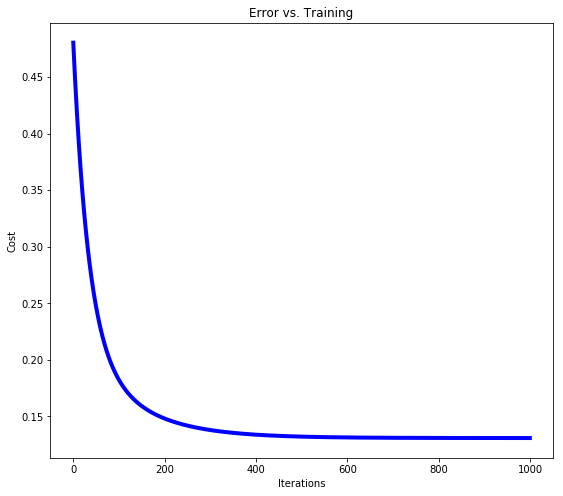

In [13]:
fig, ax = plt.subplots(figsize=(9,8))  
ax.plot(np.arange(iters), cost, 'blue', linewidth=4)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training')  

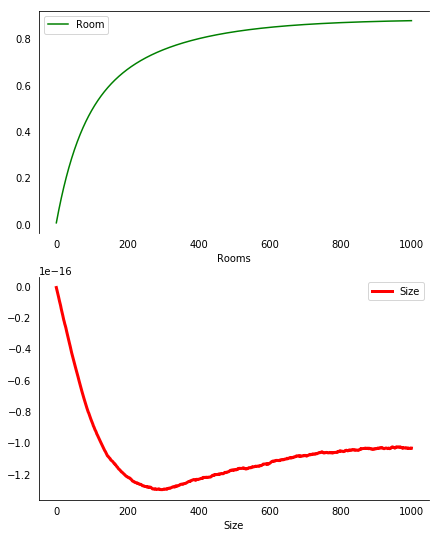

In [14]:
fig = plt.figure(figsize = (7, 9))
ax = fig.add_subplot(2, 1, 2)
ax1 = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(iters), output[:, 0], c="red", linewidth=3, label="Size")
ax.set_xlabel("Size")
ax.tick_params(left=False, bottom=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(["Size"])

ax1.plot(np.arange(iters), output[:, 1], c="green", label="Size")
ax1.set_xlabel("Rooms")
ax1.tick_params(left=False, bottom=False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.legend(["Room"])

In [46]:
def predic(size,room):
    inp=np.array([1,size,room])
    predic=np.dot(g,inp)
    return predic

In [47]:
size=int(input("enter size: "))
room=int(input("enter number of rooms: "))
print(predic(size,room))

enter size: 2000
enter number of rooms: 3
[1756.86655447]
